**Classic** **stock** predictor with **timestep** variable. Default = 60


In [ ]:
timesteps = 120

In [ ]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip

--2020-06-09 15:49:47--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.96.208
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.96.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51569 (50K) [application/zip]
Saving to: ‘P16-Recurrent-Neural-Networks.zip.2’

P16-Recurrent-Neura 100%[===================>]  50.36K  --.-KB/s    in 0.1s    

2020-06-09 15:49:47 (484 KB/s) - ‘P16-Recurrent-Neural-Networks.zip.2’ saved [51569/51569]



In [ ]:
!unzip P16-Recurrent-Neural-Networks.zip

Archive:  P16-Recurrent-Neural-Networks.zip
replace __MACOSX/._Part 3 - Recurrent Neural Networks? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset_train = pd.read_csv('/content/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')

In [ ]:
  training_set = dataset_train.iloc[:,1:2].values

In [ ]:
print((training_set))

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [ ]:
#feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))

training_set_scaled = sc.fit_transform(training_set)


In [ ]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [ ]:
X_train = []
y_train = []

for i in range(timesteps,1258):
  X_train.append(training_set_scaled[i-timesteps:i,0])
  y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train),np.array(y_train)



In [ ]:
print(np.shape(X_train))
print(np.shape(y_train))

(1138, 120)
(1138,)


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
print(np.shape(X_train))

(1138, 120, 1)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout  

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2)) #4th LSTM layer

In [ ]:
regressor.add(Dense(1))

In [ ]:
regressor.compile(optimizer='adam',loss= 'mse')

In [ ]:
regressor.fit(X_train,y_train,epochs=100,verbose=1,batch_size=32)

Epoch 1/100
1138/1138 [==============================] - 12s 11ms/step - loss: 0.0486
Epoch 2/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0066
Epoch 3/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0054
Epoch 4/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0051
Epoch 5/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0051
Epoch 6/100
1138/1138 [==============================] - 11s 9ms/step - loss: 0.0055
Epoch 7/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0048
Epoch 8/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0045
Epoch 9/100
1138/1138 [==============================] - 11s 9ms/step - loss: 0.0050
Epoch 10/100
1138/1138 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 11/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0043
Epoch 12/100
1138/1138 [==============================] - 11s 

In [ ]:
dataset_test = pd.read_csv('/content/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')

In [ ]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [ ]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [ ]:
inputs = dataset_total[len(dataset_train)- len(dataset_test)-timesteps:].values

In [ ]:
inputs = inputs.reshape(-1,1)


In [ ]:
inputs = sc.transform(inputs)

In [ ]:
X_test = []


for i in range(timesteps,timesteps+20):
  X_test.append(inputs[i-timesteps:i,0])
  

X_test = np.array(X_test)




In [ ]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[747.04987],
       [743.2926 ],
       [739.8966 ],
       [739.17255],
       [740.2913 ],
       [743.5465 ],
       [748.6127 ],
       [754.4058 ],
       [760.46857],
       [765.91095],
       [769.7091 ],
       [772.0369 ],
       [771.7399 ],
       [770.6953 ],
       [769.8648 ],
       [769.1538 ],
       [768.50977],
       [768.0954 ],
       [768.4604 ],
       [767.9911 ]], dtype=float32)

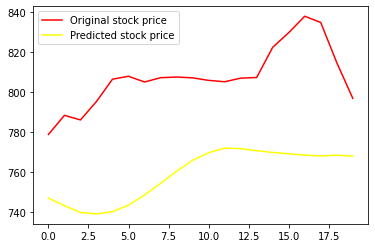

In [ ]:
plt.plot(real_stock_price,color='red',label='Original stock price')
plt.plot(predicted_stock_price,color='yellow',label='Predicted stock price')
plt.legend()
plt.show()